# Leaf Classification---Kaggle competition

## 1. Preparation for training

In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf

# Python visulization
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts as pchart
import matplotlib.image as mpimg 
import matplotlib.patches as mpatches

## Modelling Algorithms
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

## Model preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## 2. Get to knwo the dataset

In [3]:
import os

In [4]:
PATH = os.getcwd()
IMAGES = PATH + "/images"
TRAIN = PATH + "/train.csv"
TEST = PATH + "/test.csv"
SAMPLE = PATH + "sample_submission.csv"

print (PATH)

/Users/charliedang/Documents/Kaggle/LeafClassifier


### 2.1 Basic information of the dataset

In [5]:
## Get the dataset from the file

df = pd.read_csv(TRAIN, sep = ',')
df_test = pd.read_csv(TEST, sep = ',')

In [6]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,...,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,...,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,...,0.0,0.0,0.003906,0.0,0.020508,0.006836,0.0,0.001953,0.026367,0.020508,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,0.021484,0.001953,0.000000,0.005859,0.015625,0.009766,0.011719,0.011719,0.031250,0.109380,...,0.0,0.0,0.057617,0.0,0.000000,0.027344,0.0,0.000000,0.070312,0.000000,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,0.056641,0.027344,0.015625,0.007812,0.017578,0.029297,0.001953,0.042969,0.085938,0.037109,...,0.0,0.0,0.000000,0.0,0.034180,0.012695,0.0,0.033203,0.002930

In [7]:
## This is my own defined function-package

import Pdprint as pp

In [8]:
pp.get_info(df)


The Dataset has 194 columns, and 990 observations.
------------------------------------------------


The features of the DataFrame are:  ['id' 'species' 'margin1' 'margin2' 'margin3' 'margin4' 'margin5'
 'margin6' 'margin7' 'margin8' 'margin9' 'margin10' 'margin11' 'margin12'
 'margin13' 'margin14' 'margin15' 'margin16' 'margin17' 'margin18'
 'margin19' 'margin20' 'margin21' 'margin22' 'margin23' 'margin24'
 'margin25' 'margin26' 'margin27' 'margin28' 'margin29' 'margin30'
 'margin31' 'margin32' 'margin33' 'margin34' 'margin35' 'margin36'
 'margin37' 'margin38' 'margin39' 'margin40' 'margin41' 'margin42'
 'margin43' 'margin44' 'margin45' 'margin46' 'margin47' 'margin48'
 'margin49' 'margin50' 'margin51' 'margin52' 'margin53' 'margin54'
 'margin55' 'margin56' 'margin57' 'margin58' 'margin59' 'margin60'
 'margin61' 'margin62' 'margin63' 'margin64' 'shape1' 'shape2' 'shape3'
 'shape4' 'shape5' 'shape6' 'shape7' 'shape8' 'shape9' 'shape10' 'shape11'
 'shape12' 'shape13' 'shape14' 'shape15

In [9]:
pp.list_null(df)

194  columns: 
id : nan 0 ,  int64
species : nan 0 ,  object
margin1 : nan 0 ,  float64
margin2 : nan 0 ,  float64
margin3 : nan 0 ,  float64
margin4 : nan 0 ,  float64
margin5 : nan 0 ,  float64
margin6 : nan 0 ,  float64
margin7 : nan 0 ,  float64
margin8 : nan 0 ,  float64
margin9 : nan 0 ,  float64
margin10 : nan 0 ,  float64
margin11 : nan 0 ,  float64
margin12 : nan 0 ,  float64
margin13 : nan 0 ,  float64
margin14 : nan 0 ,  float64
margin15 : nan 0 ,  float64
margin16 : nan 0 ,  float64
margin17 : nan 0 ,  float64
margin18 : nan 0 ,  float64
margin19 : nan 0 ,  float64
margin20 : nan 0 ,  float64
margin21 : nan 0 ,  float64
margin22 : nan 0 ,  float64
margin23 : nan 0 ,  float64
margin24 : nan 0 ,  float64
margin25 : nan 0 ,  float64
margin26 : nan 0 ,  float64
margin27 : nan 0 ,  float64
margin28 : nan 0 ,  float64
margin29 : nan 0 ,  float64
margin30 : nan 0 ,  float64
margin31 : nan 0 ,  float64
margin32 : nan 0 ,  float64
margin33 : nan 0 ,  float64
margin34 : nan 0 ,  floa

In [10]:
len(df['species'].unique())

99

**Some basic information from the dataset: **

1. The original dataset is made of 194 columns
2. The first two columns are not really useful for training. Id is just a redundant column, but the species column is 
   used to as target or dependant variable
3. There is no nan value in the dataset, so the data cleaning process can be skipped
4. The other features remind us CNN could be used to train the model

In [11]:
## Let's take a look at if every category has same number of observations

df.groupby('species').count()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,...,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acer_Capillipes,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Circinatum,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Mono,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Opalus,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Palmatum,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Pictum,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Platanoids,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Rubrum,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Acer_Rufinerve,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


**Conclution: **

Since there are 990 observations in the column, but we have 99 different specises. So that the observations are evenly distributed among these data.

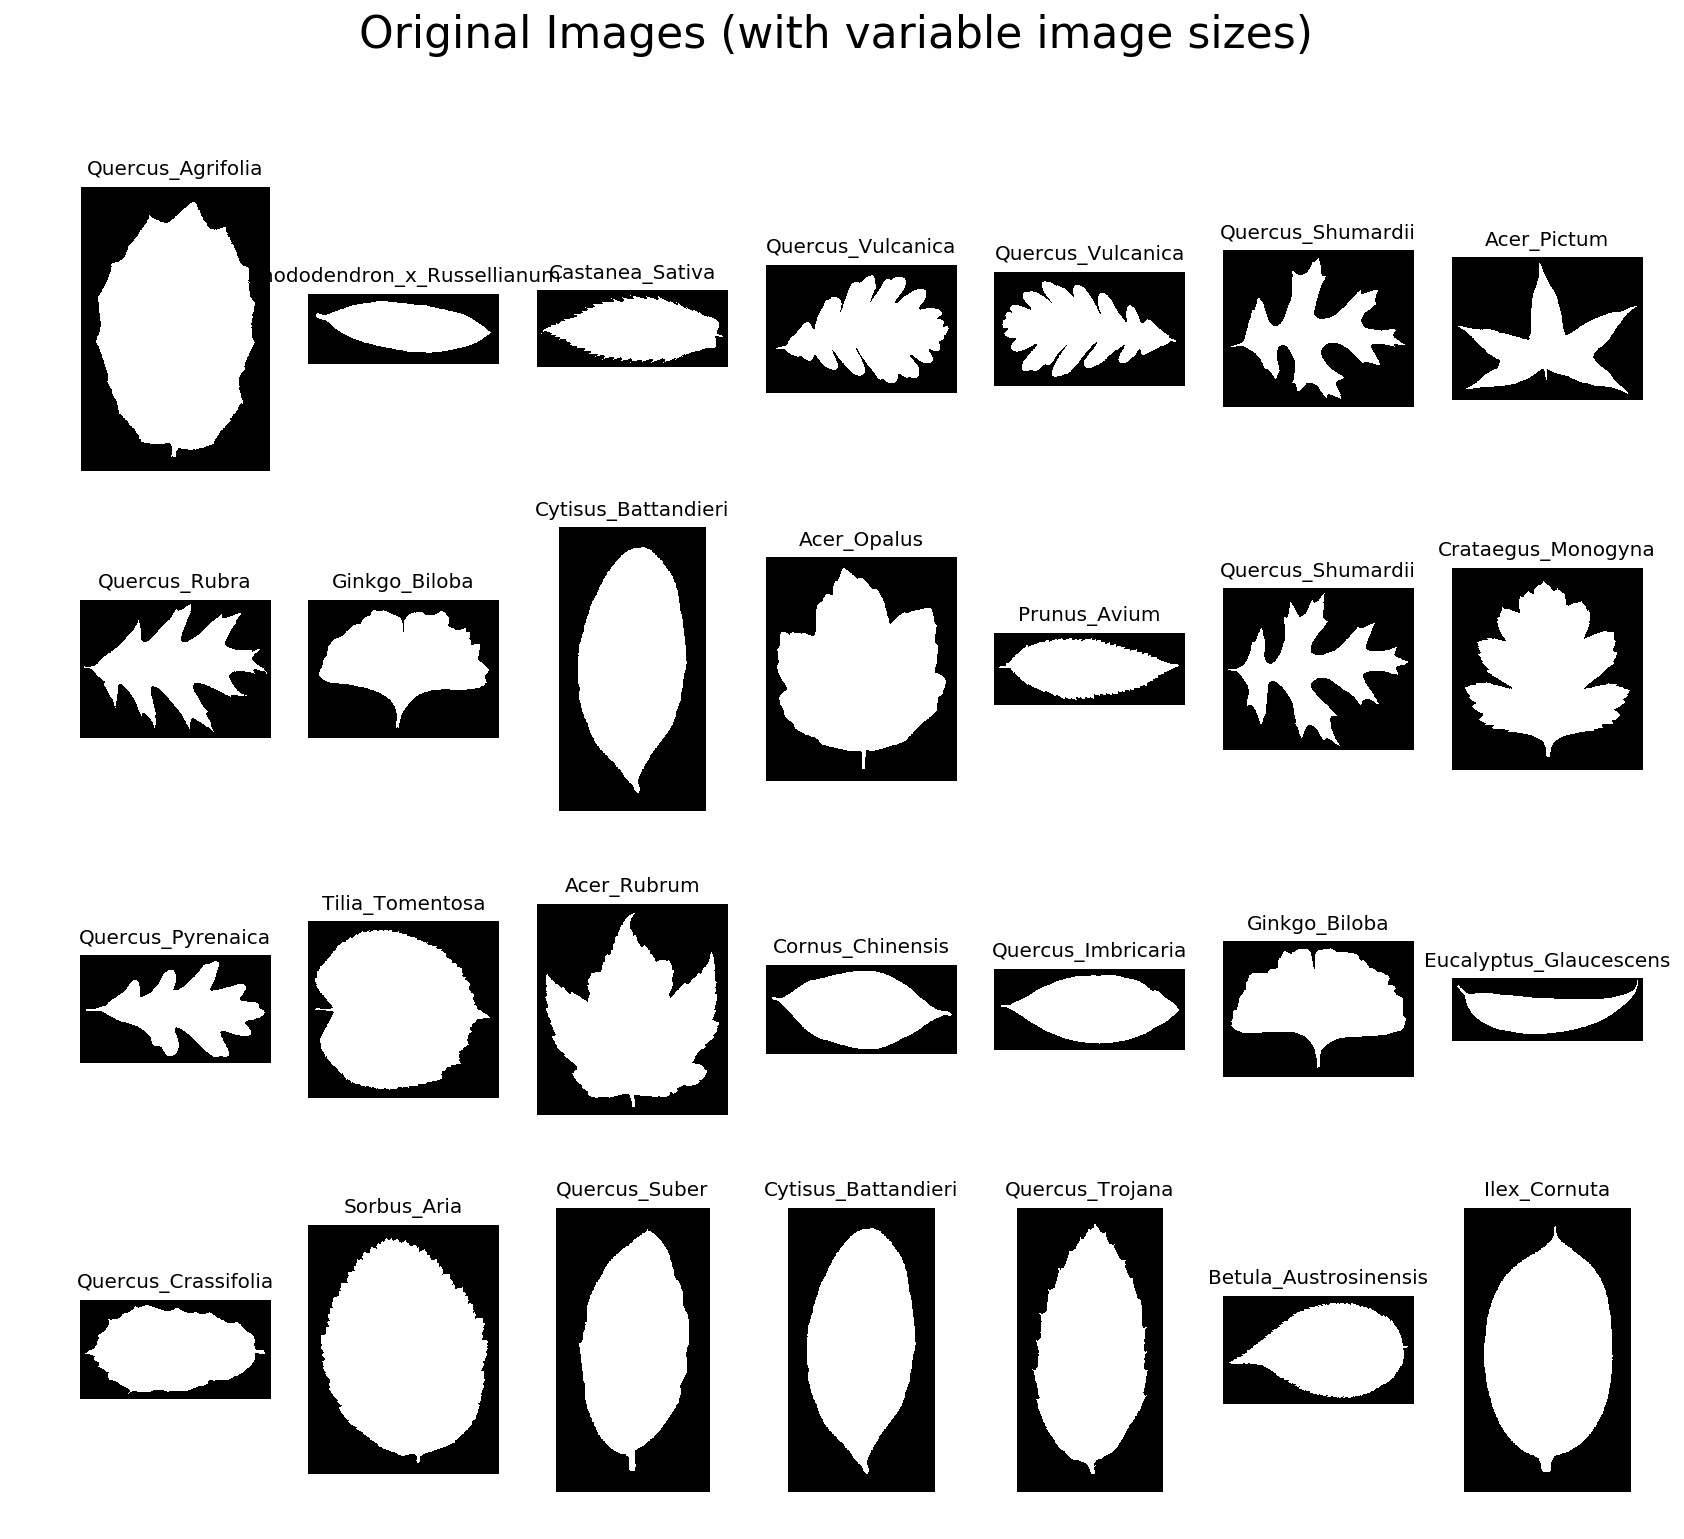

In [12]:
trainIDs = np.array(df.loc[:,'id'])
classEncoder = LabelEncoder().fit(df['species'])
trainLabels  = classEncoder.fit_transform(df.loc[:,'species'])

plt.figure(figsize=(14,12))
plt.suptitle('Original Images (with variable image sizes)', fontsize=22)
for k in range(28):
    randTrainInd = np.random.randint(len(trainIDs))
    randomID = trainIDs[randTrainInd]
    imageFilename = IMAGES + '/'+ str(randomID) + '.jpg'
    plt.subplot(4,7,k+1); plt.imshow(mpimg.imread(imageFilename), cmap='gray')
    plt.title(classEncoder.classes_[trainLabels[randTrainInd]], fontsize=10); plt.axis('off')

### 2.2 Label enconder 

In [13]:
label_fitter = LabelEncoder().fit(df['species'])
labels = label_fitter.transform(df['species'])

test_ids = df_test.id


In [14]:
## Now let's drop the unimportant features

df = df.drop(['species', 'id'], axis = 1)
df_test = df_test.drop(['id'], axis = 1)

## 3. Train test splitting

In [15]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sss.get_n_splits(df, labels)
      

for train_index, test_index in sss.split(df, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    Y_train, Y_test = labels[train_index], labels[test_index]

## 4. Model Training

### 4.1 Model Training with all the features as input

For this section, I will train the model based on four different algorithms. They are:

1. Logistic regression
2. Naive Bayes
3. SVC
4. RandomForest

In [57]:
result_col = ['Model', 'Accuracy']
result = pd.DataFrame(columns = result_col)

In [58]:
lgC = LogisticRegression(penalty='l2')

lgC.fit(X_train, Y_train)

name = lgC.__class__.__name__

train_predictions = lgC.predict(X_test)
acc = accuracy_score(Y_test, train_predictions)

lgC_data = pd.DataFrame([[name, acc*100]], columns=result_col)
result = result.append(lgC_data)

In [59]:
NBC = MultinomialNB()

NBC.fit(X_train, Y_train)

name = NBC.__class__.__name__

train_predictions = NBC.predict(X_test)
acc = accuracy_score(Y_test, train_predictions)

NBC_data = pd.DataFrame([[name, acc*100]], columns=result_col)
result = result.append(NBC_data)

In [60]:
SVM = SVC(C=0.9, kernel='rbf')
SVM.fit(X_train, Y_train)

name = SVM.__class__.__name__

train_predictions = SVM.predict(X_test)
acc = accuracy_score(Y_test, train_predictions)

SVM_data = pd.DataFrame([[name, acc*100]], columns=result_col)
result = result.append(SVM_data)

In [61]:
RFC = RandomForestClassifier(n_estimators=10, criterion='entropy')
RFC.fit(X_train, Y_train)

name = RFC.__class__.__name__

train_predictions = RFC.predict(X_test)
acc = accuracy_score(Y_test, train_predictions)

RFC_data = pd.DataFrame([[name, acc*100]], columns = result_col)
result = result.append(RFC_data)

In [62]:
result.set_index(np.arange(4))

,Model,Accuracy
0,LogisticRegression,65.656566
1,MultinomialNB,75.252525
2,SVC,80.808081
3,RandomForestClassifier,86.868687


**Conclusion**

As the DataFrame result shows, SVC and RandomForest have the best result without any further feature engineering. So Next let's tune these two models to see which is the best

### 4.2 Grid Search for parameters

In [71]:
from sklearn.model_selection import GridSearchCV
 
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [27, 36, 40,45, 50],
           "max_depth" : [5, 10, 15, 20, 25],
           "min_samples_leaf" : [2, 4, 6, 8, 10]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(X_train, Y_train)
print (CV_rfc.best_params_)

{'max_depth': 25, 'min_samples_leaf': 2, 'n_estimators': 50}


In [75]:
RFC = RandomForestClassifier(n_estimators=80, criterion='entropy',max_features='sqrt', max_depth = 20, min_samples_leaf= 2)
RFC.fit(X_train, Y_train)

name = RFC.__class__.__name__

train_predictions = RFC.predict(X_test)
acc = accuracy_score(Y_test, train_predictions)

print (acc)

0.9545454545454546
